# Data Fetching

In [1]:
import sklearn.datasets
import numpy as np
import pandas as pd
import plotly.offline as of
import plotly.graph_objs as go

of.init_notebook_mode(connected=True)

In [2]:
print("Downloading the data...")
price = sklearn.datasets.fetch_california_housing(as_frame=True)
print("Finish!")

Finish!


### How the data looks like

In [3]:
for item in price:
    print(item)
    print(price[item])
    print()

data
       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  
0        -122.2

In [4]:
house = price['frame']
print(house.info())
print(house.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.

### Pearson correlation coefficient between House median price and other factors

In [5]:
corr_matrix=house.corr()
corr_matrix["MedHouseVal"].sort_values(ascending=False)

MedHouseVal    1.000000
MedInc         0.688075
AveRooms       0.151948
HouseAge       0.105623
AveOccup      -0.023737
Population    -0.024650
Longitude     -0.045967
AveBedrms     -0.046701
Latitude      -0.144160
Name: MedHouseVal, dtype: float64

# Data Visualization

### Visualizarion of Pearson correlation coefficient between features

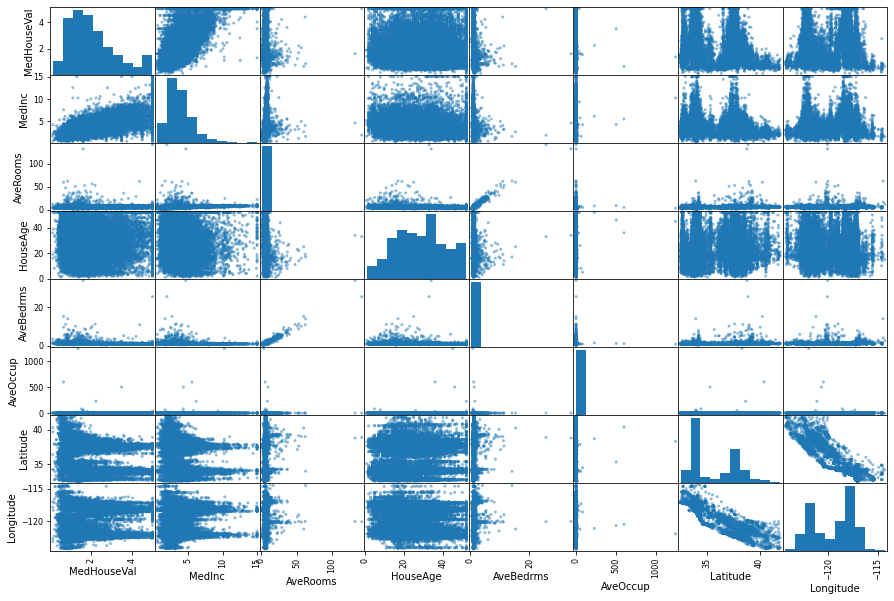

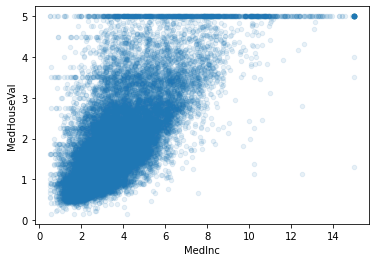

In [6]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

attributes = ["MedHouseVal", "MedInc", "AveRooms", "HouseAge", "AveBedrms", "AveOccup", "Latitude", "Longitude"]
scatter_matrix(house[attributes],figsize=(15,10))
plt.savefig('./figures/Pearson_Correlation.png', bbox_inches = 'tight')
plt.show()

house.plot(kind="scatter",x="MedInc",y="MedHouseVal",alpha=0.1)
plt.savefig('./figures/Pearson_Correlation_Inc_Val.png', bbox_inches = 'tight')
plt.show()

### 3D: 2D + Hotmap

In [7]:
def show_by_position2d(item, house, inpage=False):
    aes = go.Scatter(x=house['Latitude'], 
                     y=house['Longitude'], 
                     mode='markers', 
                     marker=dict(color=house[item], 
                             size=5, 
                             colorscale='Viridis', 
                             showscale=True)
                     )
    layout = go.Layout(title=item, 
                       autosize=False,
                       width=1000, 
                       height=1000,
                       xaxis=dict(title='Latitude'),
                       yaxis=dict(title='Logitude'))

    figure = go.Figure(data=[aes], layout=layout)
    if inpage:
        of.iplot(figure)
    else:
        of.plot(figure)
#     figure.write_image('./figures/Avl_' + item + '.png')

In [8]:
item = 'MedInc'
show_by_position2d(item, house, True)

In [9]:
item = 'MedHouseVal'
show_by_position2d(item, house, True)

### 3D

In [10]:
item = 'MedHouseVal'


fig = go.Figure(data=[go.Mesh3d(x=house['Latitude'],
                                y=house['Longitude'],
                                z=house[item],
                      opacity=0.5,
                      color='rgb(0,100,0)'
                               )])
 
fig.layout.update(
    scene = dict(
                 xaxis=dict(title='Latitude'),
                 yaxis=dict(title='Logitude'),
                 zaxis=dict(title=item)),
                autosize=True,
    margin=dict(r=20, l=10, b=10, t=10))
    
fig.show()
# fig.write_image('./figures/3d_La_Lon_Val.png')

### 4D: 3D + Hotmap

In [11]:
def show_by_position3d(item1, item2, house, inpage=False):
    aes = go.Scatter3d(x=house['Latitude'], 
                     y=house['Longitude'],
                     z=house[item1],
                     marker=dict(color=house[item2], 
                             size=5, 
                             colorscale='Viridis', 
                             showscale=True)
                     )
    layout = go.Layout(title=item2, 
                       autosize=False,
                       width=1000, 
                       height=1000)

    figure = go.Figure(data=[aes], layout=layout)
    figure.layout.update(scene=dict(
                                    xaxis=dict(title='Latitude'),
                                    yaxis=dict(title='Logitude'),
                                    zaxis=dict(title=item1)))
    if inpage:
        of.iplot(figure)
    else:
        of.plot(figure)
#     figure.write_image('./figures/4d_La_Lon_' + item1 + '_' + item2 + '.png')

In [12]:
item1 = 'MedInc'
item2 = 'MedHouseVal'
show_by_position3d(item1, item2, house, True)

# Data Modeling

### Fetching data

In [ ]:
import sklearn.datasets
import numpy as np
import pandas as pd
import copy
from tqdm import tqdm

print("Downloading the data...")
price = sklearn.datasets.fetch_california_housing(as_frame=True)
print("Finish!")

house = price['frame']
print(house.info())
print(house.describe())

### Function for seperating data randomly

In [ ]:
def seperate_random_pandas(percent, data):
    rand_data = data.sample(frac=1.0)
    rand_data = rand_data.reset_index(drop=True)
    wall = int(len(rand_data) * percent)
    data1 = rand_data.loc[0: wall]
    data2 = rand_data.loc[wall+1:]
    return data2, data1

In [ ]:
train, test = seperate_random_pandas(0.1, house)

In [ ]:
a = np.ones(shape=(20640, 1))

print(house['MedHouseVal'])
test000 = house['MedHouseVal'].values.reshape((house['MedHouseVal'].values.size, 1))
print(test000.shape)
print(a)
print(a.shape)
print(house['MedHouseVal'].values.size)
print(a-test000)

### Data preperation

In [ ]:
## transform x into \xi
def trans_xi(data, factors, max_grade=4, show=False):
    ret = np.ones(shape=(len(data), pow(max_grade+1, len(factors))), dtype=np.float64)
    if show:
        with tqdm(total=pow(max_grade+1, len(factors))-max_grade-1) as pbar:
            for i in range(len(factors)):
                for grade in range(max_grade+1):
                    if i == 0:
                        if grade != 0:
                            ret[:, grade] = data[factors[i]] * ret[:, grade-1]
                    else:
                        now_vec = ret[:, 0:pow(max_grade+1, i)]
                        if grade != 0:
                            for j in range(pow(max_grade+1, i)):
                                ret[:, grade * pow(max_grade+1, i) + j] = now_vec[:, j] * pow(data[factors[i]], grade)
                                pbar.update(1)
    else:
        for i in range(len(factors)):
            for grade in range(max_grade+1):
                if i == 0:
                    if grade != 0:
                        ret[:, grade] = data[factors[i]] * ret[:, grade-1]
                else:
                    now_vec = ret[:, 0:pow(max_grade+1, i)]
                    if grade != 0:
                        for j in range(pow(max_grade+1, i)):
                            ret[:, grade * pow(max_grade+1, i) + j] = now_vec[:, j] * pow(data[factors[i]], grade)
    return ret

In [ ]:
xi = trans_xi(house, ['MedInc', 'Latitude', 'Longitude', 'AveOccup', 'AveBedrms', 'AveRooms'], 4, show=True)
print(xi.shape)
print(xi[0])
print(house['MedInc'][0])
print(house['MedHouseVal'][0])

In [ ]:
def seperate_random_np(percent, X, Y):
    new_X = copy.deepcopy(X)
    new_Y = copy.deepcopy(Y)
    
    state = np.random.get_state()
    np.random.shuffle(new_X)
    np.random.set_state(state)
    np.random.shuffle(Y)
    
    wall = int(len(new_X) * percent)
    X1 = new_X[0: wall]
    X2 = new_X[wall+1:]
    Y1 = new_Y[0: wall]
    Y2 = new_Y[wall+1:]
    
    return X2, X1, Y2, Y1

### Linear regression

In [ ]:
## define a class for linear regretion
class LinearRegression():
    """
    n_iters:            iteration times
    learning_rate:      learning rate
    alpha:              alpha for L2 regularization
    tolerant:           minimum tolerant error
    batch_size:         batch size
    """
    def __init__(self, n_iters, learning_rate, alpha, tolerant, batch_size):
        self.n_iters = n_iters
        self.learning_rate = learning_rate
        self.alpha = alpha
        self.tolerant = tolerant
        self.batch_size = batch_size
        
    def init_weights(self, n_features):
        limit = np.sqrt(1 / n_features)
        self.w = np.random.uniform(-limit, limit, (n_features, 1))
    
    def prediction(self, X):
        return X.dot(self.w)
    
    ## L2 regularization
    def regularization(self):
        loss = self.w.T.dot(self.w)
        return 0.5 * self.alpha * float(loss)
        
    def fit(self, X, y):
        m_samples, n_features = X.shape
        self.init_weights(n_features)
        self.training_errors = []
        
        for i in range(self.n_iters):
            ## shuffle the training data at each iter
            state = np.random.get_state()
            np.random.shuffle(X)
            np.random.set_state(state)
            np.random.shuffle(y)
            for offset in range(0, m_samples, self.batch_size):
                end = offset + self.batch_size
                x_batch = X[offset:end]
                y_batch = y[offset:end]
                y_pred = self.prediction(x_batch)
                # Calculate the loss
                error = np.sum(0.5 * (y_pred - y_batch) ** 2)
                loss = error + self.regularization()
#                 print('batch: ', error, loss)
                # Calculate the gradient
                w_grad = x_batch.T.dot(y_pred - y_batch) + self.alpha * self.w
                # Update the weight
                self.w -= self.learning_rate * w_grad
            error = np.mean(0.5 * (self.prediction(X) - y) ** 2)
            self.training_errors.append(error)
            print('iter: ',error)
            if error < self.tolerant:
                print('break')
                break

In [ ]:
## standarization of the xi
def standardization(X):
    mu = np.mean(X, axis=0)
    divid = X.max(axis=0) - X.min(axis=0)
#     sigma = X.std(axis=0)
    mu[0] = 0
    divid[0] = 1
    return ((X - mu) / divid).astype(np.float16)

features = ['Latitude', 'Longitude']
X = trans_xi(house, features)
Y = house['MedHouseVal'].values.reshape((house['MedHouseVal'].values.size, 1))

X_Stand = standardization(X)

Train_x, Test_x, Train_y, Test_y = seperate_random_np(0.2, X_Stand, Y)

x_train, x_valid, y_train, y_valid = seperate_random_np(0.2, Train_x, Train_y)
print(abs(x_train).max(axis=0))
print(abs(x_train).min(axis=0))

model = LinearRegression(3000, 0.001, 0.5, 0.0001, 128)
model.fit(x_train, y_train)

In [ ]:
## standarization of x
new_house = (house - house.mean())/(house.max()- house.min())
# print(abs(new_house).max())
# print(abs(new_house).min())
new_house['MedHouseVal'] = house['MedHouseVal']
Train, Test = seperate_random_pandas(0.2, new_house)
Train, Test = seperate_random_pandas(0.2, new_house)
train, valid = seperate_random_pandas(0.2, Train)

features = ['Latitude', 'Longitude']
x_train = trans_xi(train, features)
# x_train = (x_train - x_train.mean(axis=0)) / (x_train.max(axis=0) - x_train.min(axis=0))
y_train = train['MedHouseVal'].values.reshape((train['MedHouseVal'].values.size, 1))

x_valid = trans_xi(valid, features)
y_valid = valid['MedHouseVal'].values.reshape((valid['MedHouseVal'].values.size, 1))

model = LinearRegression(3000, 0.0001, 0.5, 0.0001, 128)
model.fit(x_train, y_train)
# print(model.training_errors)

In [ ]:
error = model.prediction(x_valid) - y_valid
error_persent = abs(error/y_valid)
print(y_valid)
print(abs(error).max())
print(abs(error).min())
print()
print(error_persent.max())
print(error_persent.min())
print(error_persent.mean())

# Result Visualization

In [ ]:
import pickle
import plotly.offline as of
import plotly.graph_objs as go     
import numpy as np

of.init_notebook_mode(connected=True)

In [ ]:
with open("./model.pickle", 'rb') as f:
    data = pickle.load(f)

w = data[0]
errors = data[1]
mu = data[2]
divid = data[3]

In [ ]:
data = go.Scatter(
     x = [i for i in range(len(errors))],
     y = errors,
     showlegend=True
)
layout = go.Layout(title='Error - iteration times', 
                       autosize=True,
                       xaxis=dict(title='iteration times'),
                       yaxis=dict(title='Error(MSE)'))

figure = go.Figure(data=[data], layout=layout)

of.iplot(figure)